# Centralized gradient methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

VARS_DIM = 5
SEED = 42

In [2]:
def quadratic_fn(z, Q, r):
    val = 0.5 * z.T @ Q @ z + r.T @ z
    grad = Q @ z + r
    return val, grad


def cost_builder(Q, r):
    return lambda z: quadratic_fn(z, Q, r)

In [3]:
rng = np.random.default_rng(SEED)

Q = np.diag(rng.uniform(size=VARS_DIM))
r = rng.uniform(size=VARS_DIM)
z0 = rng.random((VARS_DIM,))

cost_fn = cost_builder(Q, r)


optimal_z = -np.linalg.inv(Q) @ r
optimal_cost, _ = cost_fn(optimal_z)

## Gradient descent

Cost: -2.723371206290632 | Optimal: -2.7234752493667536
z:    [-1.26056558 -1.73428365 -0.91552086 -0.18371022 -4.7353116 ] | Optimal: [-1.26056558 -1.73428365 -0.91552086 -0.18371022 -4.78231706]


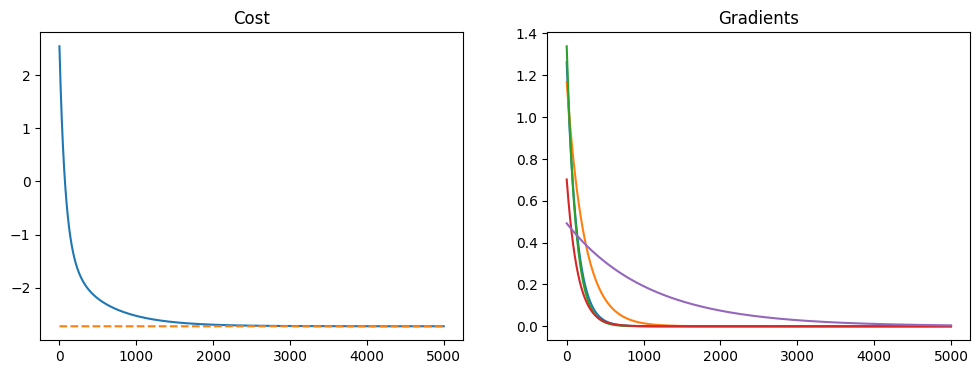

In [4]:
def gradient_method(z0, cost_fn, alpha, num_iters):
    z = np.zeros((num_iters+1, z0.shape[0]))
    z[0] = z0

    for k in range(num_iters):
        _, grad = cost_fn(z[k])
        z[k + 1] = z[k] - alpha * grad

    return z


history_z_gd = gradient_method(
    z0 = z0.copy(), 
    cost_fn = cost_fn, 
    alpha = 1e-2,
    num_iters = 5000
)


print(f"Cost: {cost_fn(history_z_gd[-1])[0]} | Optimal: {optimal_cost}")
print(f"z:    {history_z_gd[-1]} | Optimal: {optimal_z}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Cost")
plt.plot([ cost_fn(z)[0] for z in history_z_gd ])
plt.plot([optimal_cost]*len(history_z_gd), "--")

plt.subplot(1, 2, 2)
plt.title("Gradients")
plt.plot([ cost_fn(z)[1] for z in history_z_gd ])

plt.show()

## Heavy-ball method

Cost: -2.7234408643632886 | Optimal: -2.7234752493667536
z:    [-1.26056558 -1.73428365 -0.91552086 -0.18371022 -4.75529452] | Optimal: [-1.26056558 -1.73428365 -0.91552086 -0.18371022 -4.78231706]


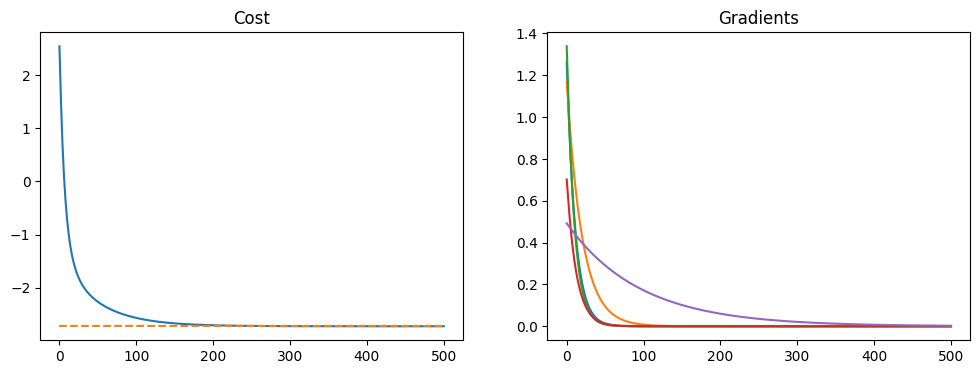

In [5]:
def heavy_ball_method(z0, cost_fn, alpha1, alpha2, num_iters):
    z = np.zeros((num_iters+1, z0.shape[0]))
    xi = np.zeros((num_iters+1, z0.shape[0]))
    v = np.zeros((num_iters+1, z0.shape[0]))
    y = np.zeros((num_iters+1, z0.shape[0]))
    z[0] = z0
    xi[0] = z0

    for k in range(num_iters):
        v[k] = z[k]
        _, grad_v = cost_fn(v[k])

        y[k] = alpha2 * -grad_v

        z[k+1] = (1+alpha1) * z[k] - (alpha1 * xi[k]) + y[k]
        xi[k+1] = z[k]
    
    return z


history_z_hb = heavy_ball_method(
    z0 = z0.copy(), 
    cost_fn = cost_fn, 
    alpha1 = 0.1,
    alpha2 = 1e-1,
    num_iters = 500
)


print(f"Cost: {cost_fn(history_z_hb[-1])[0]} | Optimal: {optimal_cost}")
print(f"z:    {history_z_hb[-1]} | Optimal: {optimal_z}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Cost")
plt.plot([ cost_fn(z)[0] for z in history_z_hb ])
plt.plot([optimal_cost]*len(history_z_hb), "--")

plt.subplot(1, 2, 2)
plt.title("Gradients")
plt.plot([ cost_fn(z)[1] for z in history_z_hb ])

plt.show()